In [28]:
include("load_save.jl")
R, X, Y, L, F, Y, PY = load_big_dataset("avGFP")
R1, X1, Y1, L1, MF1, SF1, Y1, PY1 = load_small_dataset("avGFPs", 'F')
M = load_dataset_model("avGFP")
M1 = load_dataset_model("avGFPs", 'F');

Dataset : avGFP_B


Sample : 51715
Variable : 233


Dataset : avGFPs_F


Sample : 102
Variable : 243


In [71]:
function min_max_norm_rev(ref::Vector{Float64}, tar::Vector{T}) where T <: Real
    min_val, max_val = extrema(ref)
    return (tar .* (max_val - min_val)) .+ min_val
end

function min_max_norm_rev(ref::Vector{Float64}, tar::Real)
    min_val, max_val = extrema(ref)
    return (tar * (max_val - min_val)) + min_val
end

min_max_norm_rev (generic function with 2 methods)

In [42]:
using FASTX, XLSX, DataFrames

In [46]:
excel_data = DataFrame(XLSX.readtable(R1.data_loc, "Sheet1", infer_eltypes=true))
excel_select_vector = excel_data[!, Int('F') - Int('A') + 1]
data_idx = findall(!ismissing, excel_select_vector);

In [47]:
seq_vector = [FASTA.sequence(String, record) for record in open(FASTA.Reader, R.fasta_loc)]
seq1_vector = [FASTA.sequence(String, record) for record in open(FASTA.Reader, R1.fasta_loc)][data_idx];

In [65]:
same_idx = [|([x == i for x in seq_vector]...) for i in seq1_vector]
findall(isequal(true), same_idx)

1-element Vector{Int64}:
 90

In [93]:
seq_vector[37612] == seq1_vector[90]

true

In [70]:
refY = get_data(RF("Data/avGFP"), 'B')[2]
refY1 = get_data(RF("Data/avGFPs"), 'F')[2];

In [73]:
seq2seq1 = refY[37612] / refY1[90]

0.24079931136334404

In [89]:
NPY = min_max_norm_rev(refY1, parallel_predict(M1, L1, seq_vector)) .* seq2seq1
NPY1 = min_max_norm_rev(refY, parallel_predict(M, L, seq1_vector)) ./ seq2seq1;

In [4]:
issubset("avGFP", "avGFP")

true

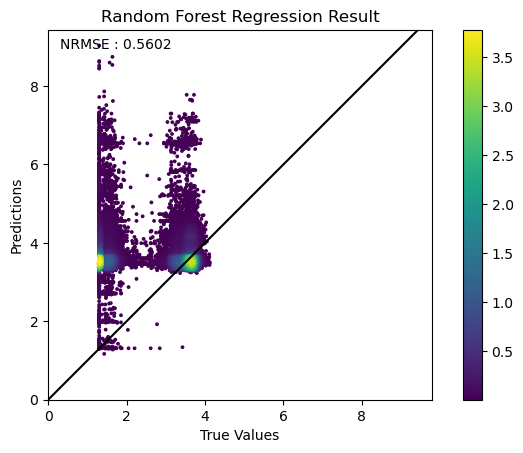

NRMSE : 0.560235


In [94]:
view_result(NPY, refY);

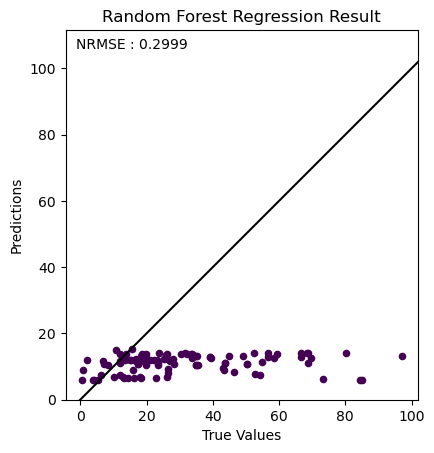

NRMSE : 0.299940


In [96]:
view_result(NPY1, refY1);